This notebook is created to investigate what chemical classes exist in the filtered spectral library of MSn positive and negative

In [1]:
from matchms.importing import load_from_mgf
spectra = list(load_from_mgf("/home/ioannis/thesis_data/msn_positive_filtered.mgf"))
print(len(spectra))

132736


In [2]:
print(spectra[0].metadata)

{'charge': 1, 'description': 'ENAMMOL', 'formula': 'C20H20FNO4', 'inchi': 'InChI=1S/C20H20FNO4/c1-25-17-7-3-6-15-16-10-22(9-13-4-2-5-14(21)8-13)11-20(16,19(23)24)12-26-18(15)17/h2-8,16H,9-12H2,1H3,(H,23,24)/t16-,20-/m1/s1', 'smiles': 'COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21', 'feature_id': '20240405_pluskal_enammol_5004_A22_id_MSn_positive.mzML msn trees:17', 'adduct': '[M+Na]+', 'feature_ms1_height': '4.404E7', 'spectype': 'SINGLE_BEST_SCAN', 'collision_energy': '60.0', 'fragmentation_method': 'HCD', 'isolation_window': '1.2000000476839432', 'acquisition': 'Commercial', 'ims_type': 'none', 'ion_source': 'ESI', 'ionmode': 'positive', 'dataset_id': 'MSV000094528', 'usi': '[mzspec:MSV000094528:20240405_pluskal_enammol_5004_A22_id_MSn_positive:256]', 'scans': '256', 'precursor_purity': '1.0', 'quality_chimeric': 'PASSED', 'quality_explained_intensity': '0.9651663', 'quality_explained_signals': '0.9128205', 'num_peaks': '195', 'compound_name': '(2R,6R)-4-[(3-fluorophenyl)methyl]

In [3]:
print(f'Smiles: {spectra[0].get("smiles")}')
print(f'Inchi: {spectra[0].get("inchi")}')
print(f'Description: {spectra[0].get("description")}')

Smiles: COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21
Inchi: InChI=1S/C20H20FNO4/c1-25-17-7-3-6-15-16-10-22(9-13-4-2-5-14(21)8-13)11-20(16,19(23)24)12-26-18(15)17/h2-8,16H,9-12H2,1H3,(H,23,24)/t16-,20-/m1/s1
Description: ENAMMOL


In [4]:
inchikeys = []
records = []

for s in spectra:
    inchikey = s.get("inchikey")
    smiles = s.get("smiles")
    feature_id = s.get("feature_id")
    inchikeys.append(inchikey)
    records.append((feature_id, inchikey, smiles))

print(f"Total spectra: {len(spectra)}")
print(f"Unique InChIKeys: {len(set(inchikeys))}")

Total spectra: 132736
Unique InChIKeys: 41568


In [5]:
for r in records[:5]:
    print(r)


('20240405_pluskal_enammol_5004_A22_id_MSn_positive.mzML msn trees:17', 'UTXPDZFPPUZUBK-OXQOHEQNSA-N', 'COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21')
('20240405_pluskal_enammol_5004_A22_id_MSn_positive.mzML msn trees:17', 'UTXPDZFPPUZUBK-OXQOHEQNSA-N', 'COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21')
('20240405_pluskal_enammol_5004_A22_id_MSn_positive.mzML msn trees:17', 'UTXPDZFPPUZUBK-OXQOHEQNSA-N', 'COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21')
('20240405_pluskal_enammol_5004_B7_id_MSn_positive.mzML msn trees:2', 'NHWREWFNNXLTDT-UHFFFAOYSA-N', 'Nc1nc2c(cc(CC(=O)O)cc2)s1')
('20240405_pluskal_enammol_5004_B7_id_MSn_positive.mzML msn trees:2', 'NHWREWFNNXLTDT-UHFFFAOYSA-N', 'Nc1nc2c(cc(CC(=O)O)cc2)s1')


In the filtered dataset there are a lot of compounds that share the same InChIKey but have different adduct or collision energy. This characteristic is useful for the generalization of the model, but not for investigating the different chemical classes. To unburden the search for the chemical classes, deduplication of InChIKey is done.

In [6]:
from collections import Counter
import pandas as pd

# Count occurrences of each InChIKey(how many spectra correspond to the same inchikey)
all_inchikeys = [ik for _, ik, _ in records if ik]
counts = Counter(all_inchikeys)

# Build dictionary only with the unique inchikeys
unique = {}
for feature_id, ik, smiles in records:
    if not ik:
        continue
    if ik not in unique:
        unique[ik] = {
            "smiles": smiles,
            "feature_count": counts[ik]
        }

# Convert to DataFrame
unique_df = pd.DataFrame.from_dict(unique, orient="index").reset_index()
unique_df = unique_df.rename(columns={"index": "inchikey"})

print(unique_df.head())


                      inchikey  \
0  UTXPDZFPPUZUBK-OXQOHEQNSA-N   
1  NHWREWFNNXLTDT-UHFFFAOYSA-N   
2  ZWHHBRKAHNHHDN-UHFFFAOYSA-N   
3  DVUSXQGMZHRAPP-UHFFFAOYSA-N   
4  OHLKQPVOQXXCDW-UHFFFAOYSA-N   

                                              smiles  feature_count  
0  COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@...              3  
1                          Nc1nc2c(cc(CC(=O)O)cc2)s1              3  
2           CCn1c(NCCCn2nc(C)cc2C)nc2c1ncc(C(=O)O)c2              3  
3                            Cc1c(C(=O)O)cnc2ccccc12              5  
4                               O=C(O)c1c2cccnc2ncc1              2  


In [7]:
unique_inchikeys = list(unique.keys())
print(len(unique_inchikeys))
with open("unique_inchikeys.txt", "w") as f:
    for ik in unique_inchikeys:
        f.write(ik + "\n")



41568


In [8]:
print(unique_df.loc[0, "smiles"])


COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21


In [9]:
structures_file     = "/home/ioannis/thesis_data/structures.tsv.gz"
relations_file      = "/home/ioannis/thesis_data/relation.tsv.gz"
relation_types_file = "/home/ioannis/thesis_data/relation_type.tsv.gz"
compounds_file      = "/home/ioannis/thesis_data/compounds.tsv.gz"   


In [10]:
structures = pd.read_csv(structures_file, sep="\t", compression="gzip")
relations = pd.read_csv(relations_file, sep="\t", compression="gzip")
relation_types = pd.read_csv(relation_types_file, sep="\t", compression="gzip")
compounds = pd.read_csv(compounds_file, sep="\t", compression="gzip")


/tmp/ipykernel_4650/2899065704.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  relations = pd.read_csv(relations_file, sep="\t", compression="gzip")


In [11]:
print(structures.columns.tolist())

['id', 'compound_id', 'status_id', 'molfile', 'smiles', 'standard_inchi', 'standard_inchi_key', 'dimension', 'default_structure']


In [12]:
# Here we compare the inchikey with the one from ChEBI, and if it is a match we also retrieve the compound ID.
mapped = unique_df.merge(
    structures[["compound_id", "standard_inchi_key"]],
    left_on="inchikey",
    right_on="standard_inchi_key",
    how="left"
)

print(f"Matched {mapped['compound_id'].notna().sum()} InChIKeys to ChEBI IDs")

Matched 4858 InChIKeys to ChEBI IDs


In [13]:
print(relations.columns.tolist())


['id', 'relation_type_id', 'init_id', 'final_id', 'status_id', 'evidence_accession', 'evidence_source_id']


In [14]:
print(relation_types.columns.tolist())


['id', 'code', 'allow_cycles', 'description']


In [15]:
print(compounds.columns.tolist())


['id', 'name', 'status_id', 'source', 'parent_id', 'merge_type', 'chebi_accession', 'definition', 'ascii_name', 'stars', 'modified_on', 'release_date']


In [16]:
# From relations we take the relation_type_id and we match it to relation_types to find the appropriate code
relations_named = relations.merge(
    relation_types[["id", "code"]],
    left_on="relation_type_id",
    right_on="id",
    how="left"
)

# Keep only "is_a" relationships by searching through the codes
is_a_rel = relations_named[relations_named["code"] == "is_a"]

# We link the compound_id with the init_it (child compound), that then links to the parent class. So compound_id linked to parent class
compound_classes = mapped.merge(is_a_rel, left_on="compound_id", right_on="init_id", how="left")

# We link the parent class id with the actual name
class_named = compound_classes.merge(
    compounds[["id", "name"]],
    left_on="final_id",
    right_on="id",
    how="left"
)

# Summarize class diversity (weighted by feature_count), the amount of spectra that corresponds to the same inchikey
class_counts = (
    class_named.groupby("name")["feature_count"]
    .sum()
    .sort_values(ascending=False)
)

print("\nTop 20 chemical classes (weighted by feature count):")
print(class_counts.head(20))


Top 20 chemical classes (weighted by feature count):
name
aromatic ether               997
tertiary amino compound      803
secondary amino compound     666
organic molecular entity     643
organofluorine compound      538
glycoside                    469
sulfonamide                  447
monocarboxylic acid amide    435
monochlorobenzenes           431
secondary alcohol            425
pyridines                    410
piperidines                  396
secondary carboxamide        374
phenols                      371
monocarboxylic acid          371
benzamides                   337
organochlorine compound      329
20-oxo steroid               290
imidazoles                   281
carbamate ester              277
Name: feature_count, dtype: int64


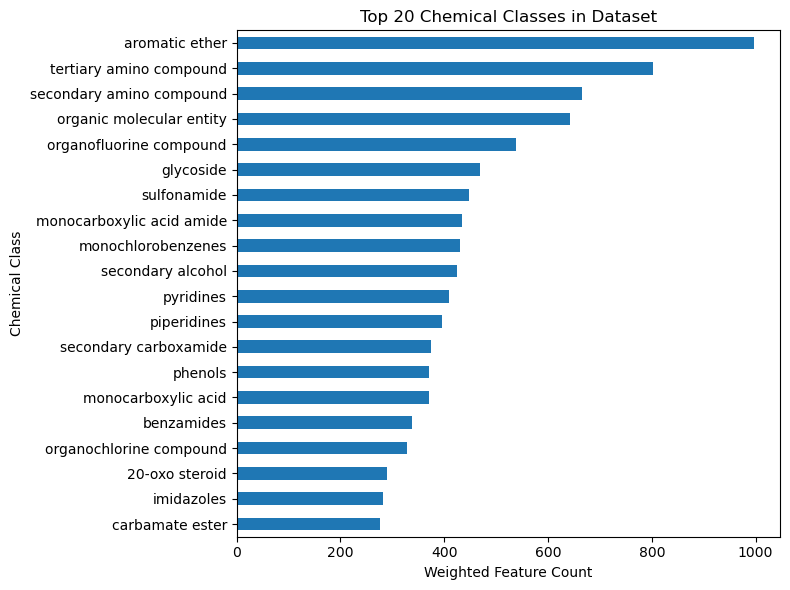

In [17]:
import matplotlib.pyplot as plt
# --- Step 5: Plot results ---
plt.figure(figsize=(8,6))
class_counts.head(20).plot(kind="barh")
plt.xlabel("Weighted Feature Count")
plt.ylabel("Chemical Class")
plt.title("Top 20 Chemical Classes in Dataset")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [18]:
n_total = unique_df.shape[0]
n_mapped = mapped["compound_id"].notna().sum()
# --- Step 6: Coverage summary ---
n_classified = class_named["name"].notna().sum()
print(f"\nCoverage: {n_classified} compounds assigned to at least one class "
      f"({n_classified/n_total:.1%} of all unique InChIKeys)")


Coverage: 10666 compounds assigned to at least one class (25.7% of all unique InChIKeys)


In [19]:
# Drop duplicates so each compound counts only once per class
unique_class_assignments = class_named[["compound_id", "name"]].drop_duplicates()

# Count unique compounds per class (unweighted)
class_counts_unweighted = (
    unique_class_assignments.groupby("name")["compound_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("\nTop 20 chemical classes (unweighted, unique compounds only):")
print(class_counts_unweighted.head(20))


Top 20 chemical classes (unweighted, unique compounds only):
name
aromatic ether               246
tertiary amino compound      180
organic molecular entity     165
secondary amino compound     156
glycoside                    140
organofluorine compound      116
monochlorobenzenes           114
secondary carboxamide        108
sulfonamide                  107
pyridines                    100
benzamides                    91
piperidines                   91
monocarboxylic acid           84
monocarboxylic acid amide     84
organochlorine compound       81
phenols                       80
flavonoids                    76
imidazoles                    72
secondary alcohol             72
monosaccharide derivative     71
Name: compound_id, dtype: int64


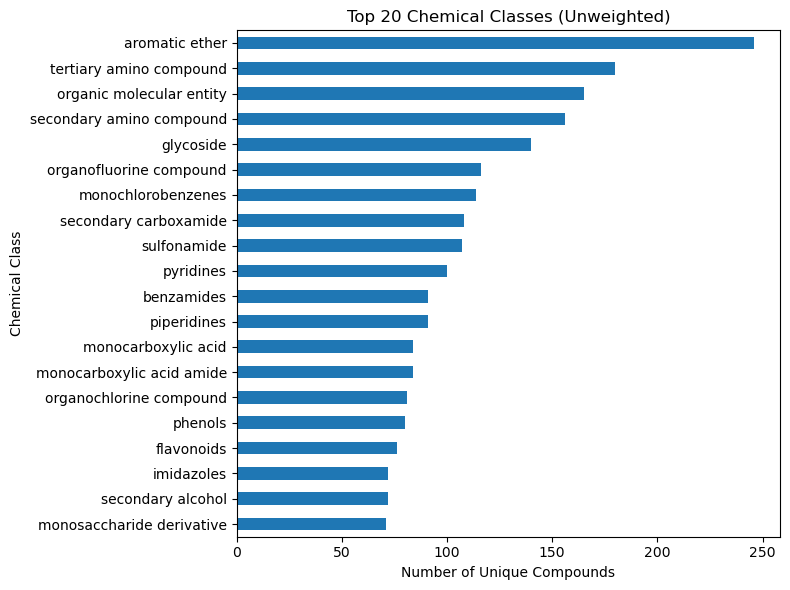

In [20]:
plt.figure(figsize=(8,6))
class_counts_unweighted.head(20).plot(kind="barh")
plt.xlabel("Number of Unique Compounds")
plt.ylabel("Chemical Class")
plt.title("Top 20 Chemical Classes (Unweighted)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [21]:
n_total = unique_df.shape[0]
n_mapped = mapped["compound_id"].notna().sum()
n_classified = unique_class_assignments["compound_id"].nunique()

print(f"Total unique InChIKeys: {n_total}")
print(f"Mapped to ChEBI IDs: {n_mapped} ({n_mapped/n_total:.1%})")
print(f"Assigned to at least one class: {n_classified} ({n_classified/n_total:.1%})")


Total unique InChIKeys: 41568
Mapped to ChEBI IDs: 4858 (11.7%)
Assigned to at least one class: 4858 (11.7%)
